In [13]:
from sympy import *
from sympy.logic.boolalg import BooleanTrue
import matplotlib.pyplot as plt
import numpy as np


Основные функции для вычислений

In [15]:
def return_gradient(x, y, pr=False):
    return 39 * (x ** 2) - 7 * y, -7 * x + 2 * y + 6 * (y ** 2)


def step(point, learning_rate, show_values=False):
    gradient_value = return_gradient(*point, True)

    if show_values:
        print(gradient_value)

    return point[0] - learning_rate * gradient_value[0], point[1] - learning_rate * gradient_value[1]


def gradient_down(start, learning_rate, iterations):
    points_queue = [start]
    for _ in range(iterations):
        points_queue.append(step(points_queue[-1], learning_rate))
    return points_queue

In [16]:
print(f'Градиент в точке (1, 2): {return_gradient(1, 2)}')
print(f'Итерация (1) после точки (1, 2): {step([1, 2], 0.1)}')
print(f'Точка итерации (1), градиент: {return_gradient(*step([1, 2], 0.1))}')
print(f'Итерация (2), градиент:{gradient_down([1, 2], 0.1, 2)[-1]}')

print('\nТочки градиентного спуска:\n')
print(*gradient_down([1, 2], 0.1, 9)[1:], sep='\n')
print('10 точки нет, т.к python ловит overflow :(\n')


Градиент в точке (1, 2): (25, 21)
Итерация (1) после точки (1, 2): (-1.5, -0.10000000000000009)
Точка итерации (1), градиент: (88.45, 10.360000000000001)
Итерация (2), градиент:(-10.345, -1.1360000000000003)

Точки градиентного спуска:

(-1.5, -0.10000000000000009)
(-10.345, -1.1360000000000003)
(-428.51439750000014, -8.9245976)
(-716570.6581884937, -354.8888217231557)
(-2002547398708.1755, -577451.017259754)
(-1.563976472788624e+25, -1601853447457.1316)
(-9.539487389001748e+50, -1.248739598979983e+25)
(-3.549070966152012e+102, -7.613251523937638e+50)
(-4.912402841885439e+205, -2.8321192689068415e+102)
10 точки нет, т.к python ловит overflow :(



Поиск аналитического значение оптимума для функции z.

In [17]:
x = Symbol('x') 
y = Symbol('y')
z = 13 * x ** 3 - 7 * x * y + y ** 2 + 2 * y ** 3 - 97
# Создаем символьное выражение sympy

z_prime_x = z.diff(x) #Производная первого порядка по x
z_prime_y = z.diff(y) #Производная первого порядка по y

z_prime_y_2 = z_prime_y.diff(y) #Производная второго порядка по y
z_prime_x_2 = z_prime_x.diff(x) #Производная второго порядка по x

Поиск точек экстремума функции Z(производная по двум переменным должна быть равна 0)

In [18]:
print('\n\nStationary points: ')
result = solve([z_prime_x, z_prime_y], x, y)  # find diff == 0
print(*result, sep='\n')
print('\n')



Stationary points: 
(0, 0)
(2*(-2/9 + (-1/2 - sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3) + 1/(81*(-1/2 - sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)))*(1/3 + 3*(-1/2 - sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3) + 1/(27*(-1/2 - sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)))/7, -2/9 + (-1/2 - sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3) + 1/(81*(-1/2 - sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)))
(2*(-2/9 + 1/(81*(-1/2 + sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3))*(1/3 + 1/(27*(-1/2 + sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)) + 3*(-1/2 + sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3))/7, -2/9 + 1/(81*(-1/2 + sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(7*sqrt(198849)/25272 + 9365/75816)**(1/3))
(2*(-2/9 + 1/(81*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)) + (7*sqrt(198849)/2527

Поиск локального максимума(Точки экстремума у которых производная 2-го порядка меньше нуля)

In [19]:
print('Local maxima:')
for element in result:
    status = True if type(z_prime_x_2.subs({x: element[0]}) < 0) \
                     == BooleanTrue else False
    if status:
        status = True if type(z_prime_y_2.subs({y: element[1]}) < 0) \
                         == BooleanTrue else False
        if status:
            print('approximate values:')
            print(f'x: {element[0].evalf()}\ny: {element[1].evalf()}\n')

            print('exact values:')
            print(f'x: {element[0]}\ny: {element[1]}\n')

Local maxima:


На всякий случай локального минимума :3

In [20]:
print('Local minimal:')
for element in result:
    status = True if type(z_prime_x_2.subs({x: element[0]}) > 0) \
                     == BooleanTrue else False
    if status:
        status = True if type(z_prime_y_2.subs({y: element[1]}) > 0) \
                         == BooleanTrue else False
        if status:
            print('approximate values:')
            print(f'x: {element[0].evalf()}\ny: {element[1].evalf()}\n')

            print('exact values:')
            print(f'x: {element[0]}\ny: {element[1]}\n')

Local minimal:
approximate values:
x: 0.276164737469651
y: 0.424915932377939

exact values:
x: 2*(-2/9 + 1/(81*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)) + (7*sqrt(198849)/25272 + 9365/75816)**(1/3))*(1/(27*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)) + 1/3 + 3*(7*sqrt(198849)/25272 + 9365/75816)**(1/3))/7
y: -2/9 + 1/(81*(7*sqrt(198849)/25272 + 9365/75816)**(1/3)) + (7*sqrt(198849)/25272 + 9365/75816)**(1/3)



Предлагаю функцию y=sin(x), у нее будет несколько минимумами. Найдите минимумы через sympy.

In [22]:
my_func = sin(x) # Функция
prime_x = my_func.diff(x) # Производная первого порядка по x
prime_x_2 = prime_x.diff(x) # Производная второго порядка по x
result = solve(prime_x, x) # Точки экстремума

Найдём среди точек экстремума локальные минимумы

In [23]:
local_min_points = []
local_min_true_value = 0
for element in result:
    status = True if type(prime_x_2.subs({x: element}) > 0) \
                     == BooleanTrue else False
    if status:
        print('approximate values:')
        print(f'x: {element.evalf()}\n')

        print('exact values:')
        print(f'x: {element}\n')
        local_min_true_value = element.evalf()

# Периодично сдвинем точки минимума
for i in range(-2, 2):
    local_min_points.append((local_min_true_value + i * 2 * pi).evalf())

approximate values:
x: 4.71238898038469

exact values:
x: 3*pi/2



Построим график используя matplotlib

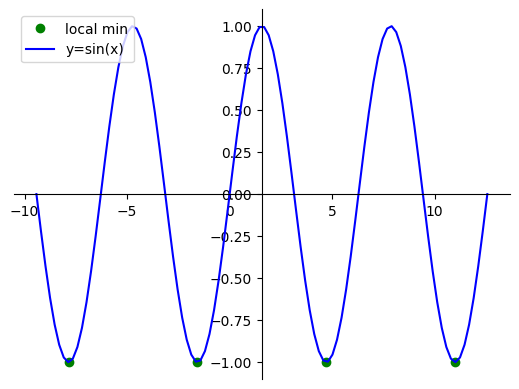

In [24]:
x_values = np.linspace(-3 * np.pi, 4 * np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

for point in local_min_points[:-1]:
    ax.plot(point, sin(point), 'go')
ax.plot(local_min_points[-1], sin(point), 'go', label='local min')

# plot the functions, with labels
plt.plot(x_values, np.sin(x_values), 'b-', label='y=sin(x)')
plt.legend(loc='upper left')

# show the plot
plt.show()

Запустите градиентный спуск из разных точек.

In [37]:
start_point_1 = (-10, np.sin(-10))
start_point_2 = (-5, np.sin(-5))
start_point_3 = (-3*np.pi/2, np.sin(-3*np.pi/2))

print(f'Найдем точки минимума с помощью градиентного спуска(1): ')
print(*gradient_down(start_point_1, 0.1, 6), sep='\n')

print(f'\nНайдем точки минимума с помощью градиентного спуска(2):')
print(*gradient_down(start_point_2, 0.1, 6), sep='\n')

print(f'\nНайдем точки минимума с помощью градиентного спуска(1):')
print(*gradient_down(start_point_3, 0.1, 6), sep='\n')

Найдем точки минимума с помощью градиентного спуска(1): 
(-10, 0.5440211108893698)
(-399.61918522237744, -6.742358492744486)
(-623216.762307575, -312.40295527667007)
(-1514757241437.8765, -495059.01985888206)
(-8.948509051906607e+24, -1207380524939.9116)
(-3.1229567558301246e+50, -7.138616975538096e+24)
(-3.803614970526157e+101, -2.4918288430217315e+50)

Найдем точки минимума с помощью градиентного спуска(2):
(-5, 0.9589242746631385)
(-101.82875300773581, -3.284582038992425)
(-40543.598222965855, -80.380880239132)
(-6410795691.639431, -32321.475005078017)
(-1.6028337546618733e+20, -5114389489.229936)
(-1.0019396575825565e+41, -1.2789255073895005e+20)
(-3.915144002002937e+82, -7.994967875148791e+40)

Найдем точки минимума с помощью градиентного спуска(1):
(-4.71238898038469, 1.0)
(-90.61816759994382, -3.0986722862692835)
(-32118.231204969205, -71.67271711159208)
(-4023197193.771952, -25622.2870440627)
(-6.312585107792381e+19, -3210159489.491008)
(-1.5541004989817636e+40, -5.037117012589